In [1]:
# No warnings please
import warnings
warnings.filterwarnings('ignore')

# Blending R with Python

An example on how to properly use `rpy2` with Jupyter Notebooks.  

This example uses the ubiquitous iris dataset just because it is easily available to everyone with `Scikit-learn` installed.  I mean to say that the iris dataset is used here only because it's easy to import and everyone has it already.  I know it's not interesting.


First let's import some useful Python libraries:

In [2]:
import pandas as pd

from sklearn import datasets

Tell Jupyter to load rpy2:

In [3]:
%load_ext rpy2.ipython

## Load Data

Load the boring dataset that we're all sick of for tutorial purposes:

In [4]:
iris = datasets.load_iris()

# Convert it's data aspects to a pandas dataframe
iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Let's grab a glimpse of these warlocks
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Push Data from Python to R

You loaded a dataset, big deal?

Yea well hold your horses cowboy.  Now we're going to move it from Python into R.

In [5]:
%%R -i iris

# Get the type of the iris object
print(typeof(iris))

# Show me the money
head(iris)

[1] "list"
  sepal.length..cm. sepal.width..cm. petal.length..cm. petal.width..cm.
0               5.1              3.5               1.4              0.2
1               4.9              3.0               1.4              0.2
2               4.7              3.2               1.3              0.2
3               4.6              3.1               1.5              0.2
4               5.0              3.6               1.4              0.2
5               5.4              3.9               1.7              0.4


Did you see what just happened?  The `%%R` notation at the head of a Jupyter cell notes that the entire cell should be executed with R.  

The `-i` parameter tells Jupyter to push an object from our Notebook kernel language, Python, into the language of the current cell, R.

We imported the Python pandas dataframe object `iris`, and called functions from R on the now R object `iris`.

## Now Do Something Interesting

Fit a line using R:

In [6]:
%%R -o lr_fit

lr_fit <- lm(petal.width..cm. ~ petal.length..cm., data=iris)
summary(lr_fit)


Call:
lm(formula = petal.width..cm. ~ petal.length..cm., data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56543 -0.12409 -0.01647  0.13251  0.64278 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.366514   0.039889  -9.188 3.35e-16 ***
petal.length..cm.  0.416419   0.009613  43.320  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.207 on 148 degrees of freedom
Multiple R-squared:  0.9269,	Adjusted R-squared:  0.9264 
F-statistic:  1877 on 1 and 148 DF,  p-value: < 2.2e-16



We moved the results of our linear regression back to Python with the `-o` *output* cell magic parameter.

In [7]:
print(lr_fit)

# Define coefficient variables
x, b = lr_fit[0][1], lr_fit[0][0] * (-1)

# Round numbers for readability
coeff = [round(n, 2) for n in [x, b]]

print("The equation for our line is: \n" + 
      "y = {}x - {} \n\n".format(coeff[0], coeff[1]) +
      "Where y is the petal width and x is the petal length.")


Call:
lm(formula = petal.width..cm. ~ petal.length..cm., data = iris)

Coefficients:
      (Intercept)  petal.length..cm.  
          -0.3665             0.4164  


The equation for our line is: 
y = 0.42x - 0.37 

Where y is the petal width and x is the petal length.


## Create Plots

Truth be told, `matplotlib`'s peasant plots are digusting when compared to `ggplot`'s grandeur.

With `rpy2` and a pinch of `cell magic` you will never have to settle.

&nbsp;

"*I would really rather not use matplotlib*"

    -Bartleby the Scatterplotter

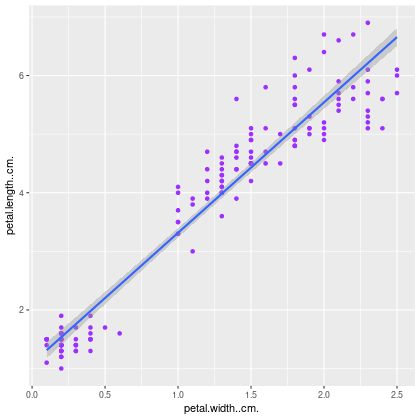

In [8]:
%%R -w 420 -h 420 -u px

library(ggplot2)

ggplot(data=iris, aes(x=petal.width..cm., y=petal.length..cm.)) + 
    geom_point(color='purple1') +
    geom_smooth(method='lm')

The parameters we pass to the rmagic function can indicate size of the output plot in our notebook.  

Read only if you're dumb: The `-w` stands for width, `-h` stands for height, and `-u px` instructs that our units of measurement for previous 2 values is in pixels.

Take notice that we also imported the `ggplot2` library in the previous cell.  You can import any library available to your R installation.  You can also import your own R scripts and execute custom R functions.  That is what we the business like to call a "pro move".

## Note to the Haters

**What's the utility in this?  Why wouldn't I just use Rstudio?**

If you thought this you might as well just stick to Rstudio because you're not imaginative enough to understand the potential here.

We are able to apply any functions we want from two universes now, Python or R.  You can pick and choose your preferred tool from either universe, all without leaving the same Jupyter notebook.  That is something to be lauded.

## Examples

Do you like cleaning data with Python pandas and think dplyr is for chumps?  Easy, just keep using Pandas then, and pass cleaned data in-memory straight into R.

Have you realized just how unreliable Scikit-learn's linear regression algorithms are?  No problem then, call R's functions to fit those lines instead!

When you can code in multiple languages within the same notebook, the world becomes your oyster.